In [150]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
t0 = time.time()

In [151]:
omega0=10000
delta=-0e-4
omega=omega0*(1+delta)
omega0*delta,omega

(-0.0, 10000.0)

In [152]:

xcr = XCrystal(XCr_path+'/config/CrystalSTO.yaml',omega)
pp=xcr.configure(0,0)

In [153]:

def single_realization_with_data(delta_theta,Rock_angle):
    
    xcr = XCrystal(XCr_path+'/config/CrystalSTO.yaml',omega)
    xcr.configure(delta_theta,Rock_angle)
    xcr.run3D()
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [154]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(0e-6,-0.000)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Omega:  10000.0 ; Reflectivity:  0.013658422065513216 ; Transmission:  0.9306587923951627


In [155]:
xcr.Z/xcr.convr

1.603345605697883e-09

In [156]:
xcr.xs/xcr.convr

4e-06

In [157]:
xcr.xx[1]/xcr.convr-xcr.xx[0]/xcr.convr

2.5006251562890335e-10

In [158]:
xcr.k0,xcr.d,xcr.dm

(0.31709512278577867, 9.907413983507317, 1.955e-10)

plt.plot(xcr.u[:,0,0],'+-')
plt.xlim(2950,3010)
#plt.ylim(0,-1)

In [159]:
xcr.lam-1.2398e-10,xcr.lam0

(4.193009239462363e-15, 1.2398419300923946e-10)

In [160]:
ket12=np.sum(U1_xyz[0,:,0,:]*np.conj(U2_xyz[0,:,0,:]),axis=0)
ket21=np.sum(U2_xyz[0,:,0,:]*np.conj(U1_xyz[0,:,0,:]),axis=0)+1e-15
thet=np.unwrap(np.angle(-ket12/ket21)) # phase difference between U1_xyz and U2_xyz calculatef from energy 

In [161]:
Ints=np.abs(U1_xyz[0,:,0,:] + U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
Ints2=np.abs(U1_xyz[0,:,0,:]*0 + U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
Ints1=np.abs(U1_xyz[0,:,0,:] + 0*U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
SumInts=np.abs(U1_xyz[0,:,0,:])**2*20 + np.abs(U2_xyz[0,:,0,:])**2

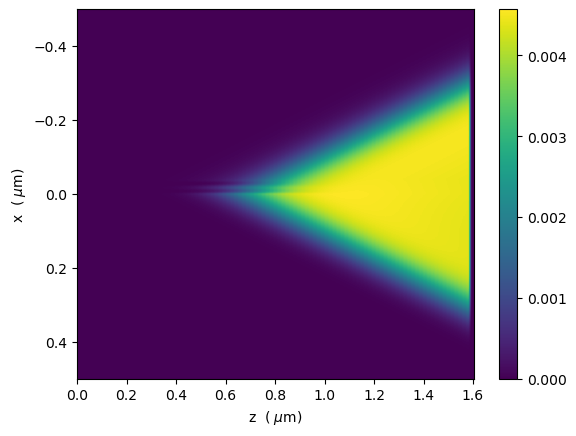

In [167]:
plt.imshow((Ints1**1),extent=[-xcr.M*xcr.Z/xcr.convr*1e6/2*0,xcr.M*xcr.Z/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6,-xcr.xx.max()/xcr.convr*1e6], aspect='auto')
#plt.imshow(np.abs(U1_xyz[0,:,0,:])**0.5 + np.abs(U2_xyz[0,:,0,:])**0.5,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(150, 250)
#plt.xlim(-60,-40)
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
plt.colorbar()

In [163]:
t1 = time.time()
t1-t0

9.79423999786377

In [164]:
Eu1=U1_xyz[0,:,0,:] 
Eu2=U2_xyz[0,:,0,:] 
Eu1.shape,xcr.z1.shape



((4000, 101), (1000,))

In [165]:
nz=799
hha=(xcr.Xx<(xcr.xs-xcr.HH))
plt.plot(xcr.xx/xcr.convr,np.abs(Eu1[:,nz]),'r')
plt.plot(xcr.xx/xcr.convr,np.imag(Eu1[:,nz]),'g')
plt.plot(xcr.xx/xcr.convr,np.abs(Eu1[:,nz])*hha[:,0],'b')
xcr.Z/xcr.convr
hha[100]*np.abs(Eu1[100,nz])
sum(np.abs(Eu1[:,nz])**2*hha[:,0])



IndexError: index 799 is out of bounds for axis 1 with size 101

In [ ]:

#plt.plot(xcr.xx/xcr.convr,np.real(Eu1[:,nz]))
#plt.plot(xcr.xx/xcr.convr,np.imag(Eu1[:,nz]))
#plt.xlim(-0.06e-6,0.04e-6)
#En1=np.sum(np.abs(Eu1[:,nz])*(xcr.Xx<(xcr.xs-xcr.HH))**2)
hha=xcr.Xx<(xcr.xs-xcr.HH)
En1=np.sum(((np.abs(Eu1[:,nz])*hha[:])**2))
En1
#xcr.z1[nz]/xcr.convr, np.max(np.abs(Eu2))

In [ ]:

plt.plot(xcr.xx/xcr.convr,np.imag(Eu1[:,nz]))
#plt.plot(xcr.xx/xcr.convr,np.imag(Eu1[:,nz]))
plt.xlim(-0.2e-6,0.01e-6)
En1=np.sum((np.abs(Eu1[:,nz]))**2)
En1
Eu1.shape

In [ ]:
xcr.dm,xcr.lam0,(xcr.xx[1]-xcr.xx[0])/xcr.convr

In [ ]:
U1_xyz.shape

In [ ]:
Eu1=U1_xyz[0,:,0,:] 
Eu2=U2_xyz[0,:,0,:] 
Eu1.shape

In [ ]:
nz=120
plt.plot(xcr.xx/xcr.convr,np.abs(Eu1[:,nz]))
#plt.plot(xcr.xx/xcr.convr,np.imag(Eu1[:,nz]))
plt.xlim(-0.6e-6,0.2e-6)
En1=np.sum((np.abs(Eu1[:,nz]))**2)
En1

In [ ]:
nz=149
plt.plot(xcr.xx/xcr.convr,np.real(Eu1[:,nz]))
plt.plot(xcr.xx/xcr.convr,np.imag(Eu1[:,nz]))
plt.xlim(-0.6e-6,0.2e-6)


In [ ]:
plt.plot(xcr.xx/xcr.convr,Ints1[:,nz])

In [ ]:
xcr.u.shape,2*xcr.xxmax/xcr.convr/xcr.xgrid,xcr.Z/xcr.convr,xcr.d/xcr.convr,xcr.lam0

In [ ]:
(2.356e-05/2-1j*1.695e-06/2)

In [ ]:
plt.plot(xcr.u[:,0,1])

In [ ]:
plt.plot(xcr.xx/xcr.convr*1e6,Ints[:,0])
#plt.xlim(-4,-6)

In [ ]:
xcr.om0/xcr.convr,xcr.omZ/xcr.convr,xcr.zR/xcr.convr,xcr.zX/xcr.convr,xcr.x00/xcr.convr

In [ ]:
Ee=xcr.E0 * 1.0 / (1.0 + 1j *xcr.zX / xcr.zR) * np.exp(-(((((xcr.Xx - xcr.x00)**2.0 + xcr.Yy**2.0) / ((xcr.om0**2.0) * (1.0 + 1j * xcr.zX/xcr.zR)))))) * np.exp(1j * (np.sin(xcr.alpha) - xcr.k0) * xcr.Xx)

In [ ]:
Eb=np.exp(-(xcr.Xx - xcr.x00)**2.0 + xcr.Yy**2.0) / ((xcr.om0**2.0) * (1.0 + 1j * xcr.zX/xcr.zR))

In [ ]:
xcr.E0 * 1.0 / (1.0 + 1j *xcr.zX / xcr.zR)

In [ ]:
(1.0 + 1j * xcr.zX/xcr.zR)

In [ ]:
plt.plot(xcr.xx/xcr.convr,np.abs(Ee)**2)

In [ ]:
plt.plot(xcr.xx/xcr.convr,np.abs(Eb)**2)

In [ ]:
SumInts=np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2
En=np.sum(Ints,axis=0) 
EnSumInt=np.sum(SumInts,axis=0) 
U2_xyz[0,200,0,1],U2_xyz.shape,xcr.E0

In [ ]:
xcr.om0/xcr.convr

In [ ]:
xcr.z1.shape,xcr.u.shape,1.6*65

In [ ]:
xcr.xxmax/xcr.xgrid/xcr.convr, xcr.Z/xcr.convr

In [ ]:
plt.plot(xcr.z1/xcr.convr)

In [ ]:
xcr.u.shape

In [ ]:
plt.plot(xcr.xx/xcr.convr*1e9,xcr.u[:,0,1]/xcr.convr)
plt.xlim(-50,10)

In [ ]:
xcr.Z/xcr.convr

In [ ]:
 xcr.alphaB/np.pi*180

In [ ]:
xcr.omega, xcr.lam0,xcr.lam

In [ ]:
SumInts=np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2
En=np.sum(Ints,axis=0) 
EnSumInt=np.sum(SumInts,axis=0) 


In [ ]:
plt.plot(En)
plt.plot((EnSumInt),'r')
#plt.ylim(300,330)
plt.show()


In [ ]:
np.exp(2j)

In [ ]:
xs=-4e-6*xcr.convr
tr = np.ones_like(xcr.xx, dtype=complex)
logh1h2=(xcr.HH+xs>xcr.xx)*(-xcr.HH+xs<=xcr.xx)
idx_nonzero = logh1h2
tr[idx_nonzero]=5+3j


In [ ]:
plt.plot(tr)

In [ ]:
def log_h1h2(k): 
        
     

        crd=(xcr.HH >= (np.cos(xcr.asymm_angle)*(xcr.Xx-xcr.xs)-np.sin(xcr.asymm_angle)*xcr.z[k] )) * (-xcr.HH <=(np.cos(xcr.asymm_angle)*(xcr.Xx-xcr.xs)-np.sin(xcr.asymm_angle)*xcr.z[k] ))*((xcr.Xx-xcr.xs) >= -xcr.CrSize/2)*((xcr.Xx-xcr.xs) < xcr.CrSize/2)
        #return void*crd
        return crd

In [ ]:
plt.plot(log_h1h2(1))

In [ ]:
def log_h1h2_film(k): 
        

        crd=(0>= (np.cos(xcr.asymm_angle)*(xcr.Xx-xcr.xs+xcr.HH)-np.sin(xcr.asymm_angle)*xcr.z[k] )) * (-xcr.d_film <=(np.cos(xcr.asymm_angle)*(xcr.Xx-xcr.xs+xcr.HH)-np.sin(xcr.asymm_angle)*xcr.z[k] ))*((xcr.Xx-xcr.xs+xcr.HH) >= -xcr.CrSize/2)*((xcr.Xx-xcr.xs+xcr.HH) < xcr.CrSize/2)
        #return void*crd
        return crd

In [ ]:
plt.plot(xcr.xx/xcr.convr,log_h1h2_film(1),'+-')
plt.plot(xcr.xx/xcr.convr,log_h1h2(1))


In [ ]:
def epsxh0x(k): 
        
       
        
        return (xcr.epsxh01 * log_h1h2_film(k)+xcr.epsxh02 * log_h1h2(k)) # function that  defines distribution of average susceptibility

In [ ]:
plt.plot(xcr.xx/xcr.convr,np.imag(epsxh0x(1)))
plt.plot(xcr.xx/xcr.convr,np.real(epsxh0x(1)))

In [ ]:
def ksih1_p_select(d_i,k):
        
        
        jv_pp1 = jv(1, 2.0 * xcr.ele_susceptH1 * xcr.Z / 2.0 / xcr.cosa * d_i) 
        #jv_pp2 = jv(1, 2.0 * xcr.ele_susceptH2 * xcr.Z / 2.0 / xcr.cosa * d_i) 
        tr1 = np.ones_like(xcr.Xx, dtype=complex)
        #tr2 = np.ones_like(xcr.Xx, dtype=complex)
        #idx_nonzero1 = log_h1h2_film(k)
        idx_nonzero1 = log_h1h2(k)
        tr1[idx_nonzero1] = 1j * jv_pp1 
        #tr2[idx_nonzero2] = 1j * jv_pp2
        #tr=tr1+tr2
        return tr1 

In [ ]:
 jv(1, 2.0 * xcr.ele_susceptH1 * xcr.Z / 2.0 / xcr.cosa * 1) 

In [ ]:
plt.plot(xcr.xx/xcr.convr,np.real(ksih1_p_select(1,1)))

In [ ]:
def ksih1_p_select(d_i,k):
        
    
        jv_pp1= jv(1, 2.0 * xcr.ele_susceptH1 * xcr.Z / 2.0 / xcr.cosa * d_i) 
        tr1 = np.zeros_like(xcr.Xx, dtype=complex)
        idx_nonzero = log_h1h2(k)
        #tr[idx_nonzero] = 1j * jv_pp * np.exp(2j * XCr.k0 * u) 
        tr1[idx_nonzero] = 1j * jv_pp1 

        return tr1 

In [ ]:
def ksih1_p_select(d_i,k):
        
        
        jv_pp1 = jv(1, 2.0 * xcr.ele_susceptH1 * xcr.Z / 2.0 / xcr.cosa * d_i) 
        #jv_pp2 = jv(1, 2.0 * xcr.ele_susceptH2 * xcr.Z / 2.0 / xcr.cosa * d_i) 
        tr1 = np.zeros_like(xcr.Xx, dtype=complex)
        #tr2 = np.ones_like(xcr.Xx, dtype=complex)
        #idx_nonzero1 = log_h1h2_film(k)
        idx_nonzero1 = log_h1h2(k)
        tr1[idx_nonzero1] = 1j * jv_pp1 
        #tr2[idx_nonzero2] = 1j * jv_pp2
        #tr=tr1+tr2
        return tr1 

In [ ]:
plt.plot(xcr.xx/xcr.convr,np.real(ksih1_p_select(1,1)))

In [ ]:


    def ksih0_select(d_i,k):
        
  
        jv0_pp1 = jv(0, 2.0 * xcr.ele_susceptH1 * xcr.Z / 2.0 / xcr.cosa * d_i) * np.exp((xcr.ele_susceptH1 * xcr.Z * d_i / 2.0 / xcr.cosa)**2
        / 2.0)-1
        jv0_pp2 = jv(0, 2.0 * xcr.ele_susceptH2 * xcr.Z / 2.0 / xcr.cosa * d_i) * np.exp((xcr.ele_susceptH2 * xcr.Z * d_i / 2.0 / xcr.cosa)**2
        / 2.0)-1
          
        tr1 =np.zeros_like(xcr.Xx, dtype=complex)
        tr2 =np.zeros_like(xcr.Xx, dtype=complex)
        idx_nonzero1 = log_h1h2_film(k)
        idx_nonzero2 = log_h1h2(k)
        tr1[idx_nonzero1] = jv0_pp1
        tr2[idx_nonzero2] = jv0_pp2
        tr=1+tr1+tr2
        return tr

In [ ]:
d_i=1
jv0_pp1 = jv(0, 2.0 * xcr.ele_susceptH1 * xcr.Z / 2.0 / xcr.cosa * d_i) * np.exp((xcr.ele_susceptH1 * xcr.Z * d_i / 2.0 / xcr.cosa)**2
        / 2.0)
jv0_pp1

In [ ]:
plt.plot(xcr.xx/xcr.convr,np.real(ksih0_select(1,1)))
plt.ylim(0.9999,1.0001)

In [ ]:
def ksih0_select(d_i,k):
   
        jv0_pp = jv(0, 2.0 * xcr.ele_susceptH1 * xcr.Z / 2.0 / xcr.cosa * d_i) * np.exp((xcr.ele_susceptH1 * xcr.Z * d_i / 2.0 / xcr.cosa)**2
        / 2.0)
          
        tr = np.ones_like(xcr.Xx, dtype=complex)
        idx_nonzero = log_h1h2(k)
        tr[idx_nonzero] = jv0_pp 
        return tr
        


In [ ]:
plt.plot(xcr.xx/xcr.convr,np.real(ksih0_select(1,1)))